### Домашнє завдання 5

#### 1. Генерування даних

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import pandas as pd

np.random.seed(12345)

X = np.random.rand(100, 2)
x1 = X[:, 0]
x2 = X[:, 1]

def polynomial_function(x1, x2):
    return (4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2)

y = polynomial_function(x1, x2)

print(f"Розмірність X: {X.shape}")
print(f"Розмірність y: {y.shape}")


Розмірність X: (100, 2)
Розмірність y: (100,)


#### 2. Додаткові ознаки

In [57]:
# Поліноміальні ознаки. 
# include_bias=True додає стовпець одиниць (для вільного члена theta_0)
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)

print(f"Розмірність X_poly (з поліномом): {X_poly.shape}")


Розмірність X_poly (з поліномом): (100, 6)


#### 3. Функції для методів градієнтного спуску

In [58]:
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(n_iter):
        grad = X.T.dot(X.dot(theta) - y) / m
        theta -= lr * grad
    return theta

def stochastic_gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    # n_iter тут - це кількість ЕПОХ
    for epoch in range(n_iter):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx]
            grad = xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * grad
    return theta

def rmsprop(X, y, lr=0.01, n_iter=1000, decay=0.9, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    cache = np.zeros(n)
    # n_iter тут - це кількість ЕПОХ
    for epoch in range(n_iter):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            cache = decay * cache + (1 - decay) * grad**2
            theta -= lr * grad / (np.sqrt(cache) + eps)
    return theta

def adam(X, y, lr=0.01, n_iter=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    t = 0
    # n_iter тут - це кількість ЕПОХ
    for epoch in range(n_iter):
        for i in range(m):
            t += 1
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * grad
            v_t = beta2 * v_t + (1 - beta2) * grad**2
            m_hat = m_t / (1 - beta1**t)
            v_hat = v_t / (1 - beta2**t)
            theta -= lr * m_hat / (np.sqrt(v_hat) + eps)
    return theta

def nadam(X, y, lr=0.01, n_iter=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    t = 0
    # n_iter тут - це кількість ЕПОХ
    for epoch in range(n_iter):
        for i in range(m):
            t += 1
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * grad
            v_t = beta2 * v_t + (1 - beta2) * grad**2
            m_hat = m_t / (1 - beta1**t)
            v_hat = v_t / (1 - beta2**t)
            # Nesterov momentum update
            m_hat_nadam = beta1 * m_hat + (1 - beta1) * grad / (1 - beta1**t)
            theta -= lr * m_hat_nadam / (np.sqrt(v_hat) + eps)
    return theta

# Встановлюємо параметри для timeit
# n_iter для GD - це ітерації
# n_iter для інших - це ЕПОХИ
print("\n--- Вимірювання часу роботи (через %timeit) ---")

n_iter_batch = 1000
n_iter_epochs = 10 # 10 епох * 100 зразків = 1000 оновлень

print("Batch GD:")
%timeit gradient_descent(X_poly, y, n_iter=n_iter_batch)

print("\nSGD (10 епох):")
%timeit stochastic_gradient_descent(X_poly, y, n_iter=n_iter_epochs)

print("\nRMSProp (10 епох):")
%timeit rmsprop(X_poly, y, n_iter=n_iter_epochs)

print("\nAdam (10 епох):")
%timeit adam(X_poly, y, n_iter=n_iter_epochs)

print("\nNadam (10 епох):")
%timeit nadam(X_poly, y, n_iter=n_iter_epochs)


--- Вимірювання часу роботи (через %timeit) ---
Batch GD:
3.27 ms ± 113 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

SGD (10 епох):
4.57 ms ± 206 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

RMSProp (10 епох):
6.23 ms ± 284 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Adam (10 епох):
14.5 ms ± 372 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Nadam (10 епох):
24.9 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### 4. Розрахунок MSE

In [59]:
# Масштабуємо оригінальні дані X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генеруємо поліноміальні ознаки з МАСШТАБОВАНИХ даних
# Ми будемо тренувати модель саме на цих даних
poly_features_scaled = PolynomialFeatures(degree=2, include_bias=True)
X_poly_scaled = poly_features_scaled.fit_transform(X_scaled)

print(f"Розмірність X_poly_scaled (для навчання): {X_poly_scaled.shape}") 

# Розділяємо поліноміальні масштабовані дані на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

Розмірність X_poly_scaled (для навчання): (100, 6)


In [60]:
common_lr = 0.01
n_iter_batch = 1000 # Ітерації для GD
n_iter_epochs = 50   # Епохи для стохастичних

methods = {
    "GD": (gradient_descent, n_iter_batch, common_lr),
    "SGD": (stochastic_gradient_descent, n_iter_epochs, common_lr),
    "RMSProp": (rmsprop, n_iter_epochs, common_lr),
    "Adam": (adam, n_iter_epochs, common_lr),
    "Nadam": (nadam, n_iter_epochs, common_lr)
}

timing_results = {}

for name, (method, n_iter, lr) in methods.items():
    print(f"Тренуємо {name}...")
    start_time = time.time()
    
    # Тренуємо на X_train
    theta = method(X_train, y_train, lr=lr, n_iter=n_iter)
    
    elapsed_time = time.time() - start_time
    
    # Прогнозуємо на X_test
    y_pred = X_test.dot(theta)
    
    # Розраховуємо MSE
    mse = mean_squared_error(y_test, y_pred)
    
    timing_results[name] = {
        "time (s)": elapsed_time,
        "mse": mse,
        "theta_shape": theta.shape,
        "final_theta": theta
    }

results_df = pd.DataFrame(timing_results).T
results_df = results_df.astype({'theta_shape': str})

print("\n--- ФІНАЛЬНІ РЕЗУЛЬТАТИ ---")
print(results_df[['time (s)', 'mse', 'theta_shape']])

print("\nЗнайдені коефіцієнти (theta):")
for name, result in timing_results.items():
    print(f"\n{name}:\n {result['final_theta']}")

Тренуємо GD...
Тренуємо SGD...
Тренуємо RMSProp...
Тренуємо Adam...
Тренуємо Nadam...

--- ФІНАЛЬНІ РЕЗУЛЬТАТИ ---
         time (s)       mse theta_shape
GD       0.006151  0.000012        (6,)
SGD      0.026123       0.0        (6,)
RMSProp   0.03722  0.000835        (6,)
Adam     0.059362       0.0        (6,)
Nadam    0.084658       0.0        (6,)

Знайдені коефіцієнти (theta):

GD:
 [ 0.50388737  1.87587908 -0.57387259  0.35175775 -0.16904587  0.41431581]

SGD:
 [ 0.51062612  1.87614304 -0.5741771   0.34994337 -0.16961481  0.41106174]

RMSProp:
 [ 0.52989735  1.86186618 -0.58729102  0.34330464 -0.19394899  0.41438789]

Adam:
 [ 0.51063189  1.87614244 -0.57417677  0.34994065 -0.16961516  0.41105972]

Nadam:
 [ 0.51063189  1.87614244 -0.57417677  0.34994065 -0.16961516  0.41105972]


#### 5. Підбір ітерацій для методів

Оптімальна кількість ітерацій - це мінімально необхідна кількість, після якої модель перестає суттєво покращуватись. Щоб зробити висновки по оптимуму - побудуємо графік залежності помилки від кількості ітерацій. За ним зрозуміємо, як поводила себе модель з часом.

In [65]:
# --- Функції з історією MSE ---

def mse(X, y, theta):
    return np.mean((X.dot(theta) - y)**2)

def gradient_descent_history(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    history = []
    for i in range(n_iter):
        grad = X.T.dot(X.dot(theta) - y) / m
        theta -= lr * grad
        history.append(mse(X, y, theta))
    return theta, history

def stochastic_gradient_descent_history(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    history = []
    for epoch in range(n_iter):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx]
            grad = xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * grad
        history.append(mse(X, y, theta)) # Записуємо MSE в кінці кожної епохи
    return theta, history

def rmsprop_history(X, y, lr=0.01, n_iter=1000, decay=0.9, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    cache = np.zeros(n)
    history = []
    for epoch in range(n_iter):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            cache = decay * cache + (1 - decay) * grad**2
            theta -= lr * grad / (np.sqrt(cache) + eps)
        history.append(mse(X, y, theta))
    return theta, history

def adam_history(X, y, lr=0.01, n_iter=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    t = 0
    history = []
    for epoch in range(n_iter):
        for i in range(m):
            t += 1
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * grad
            v_t = beta2 * v_t + (1 - beta2) * grad**2
            m_hat = m_t / (1 - beta1**t)
            v_hat = v_t / (1 - beta2**t)
            theta -= lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(mse(X, y, theta))
    return theta, history

def nadam_history(X, y, lr=0.01, n_iter=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    t = 0
    history = []
    for epoch in range(n_iter):
        for i in range(m):
            t += 1
            xi = X[i:i+1]
            yi = y[i]
            grad = xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * grad
            v_t = beta2 * v_t + (1 - beta2) * grad**2
            m_hat = m_t / (1 - beta1**t)
            v_hat = v_t / (1 - beta2**t)
            m_hat_nadam = beta1 * m_hat + (1 - beta1) * grad / (1 - beta1**t)
            theta -= lr * m_hat_nadam / (np.sqrt(v_hat) + eps)
        history.append(mse(X, y, theta))
    return theta, history


--- Запускаємо тренування для збору історії... ---
Тренування завершено, будуємо графіки...


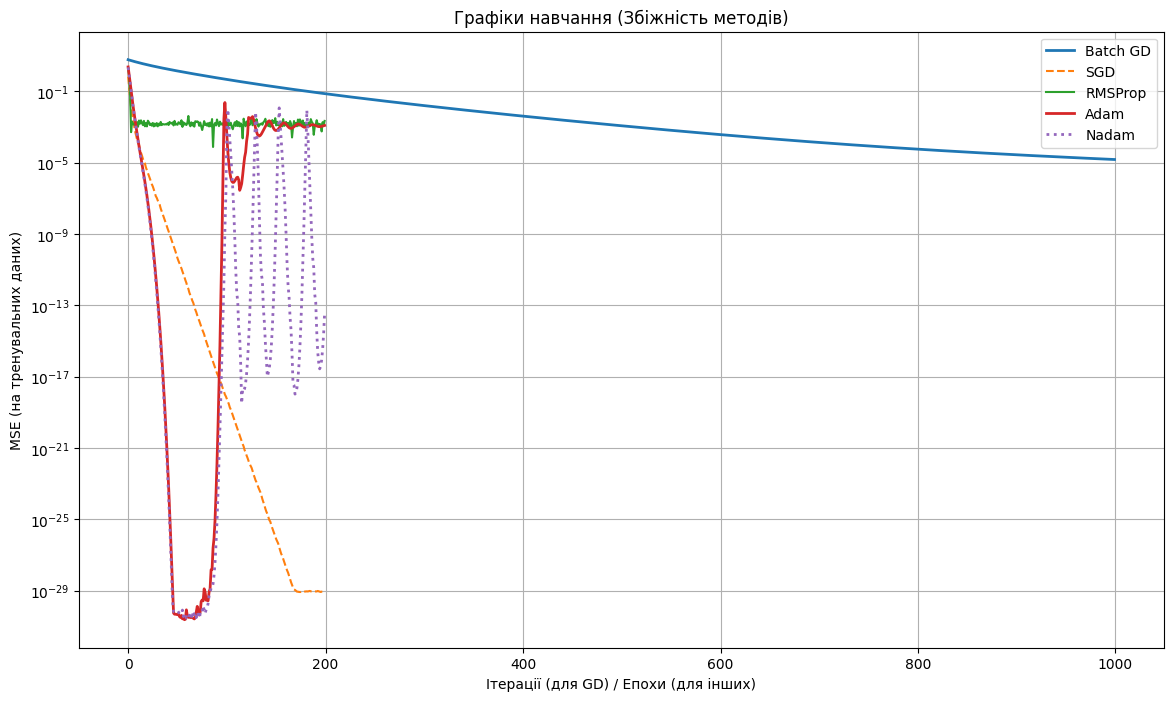

In [67]:
# --- Побудова графіків навчання ---

# Використовуємо масштабовані дані, які ми вже створили
# (X_train, X_test, y_train, y_test)

# Встановлюємо параметри
lr = 0.01
n_iter_gd = 1000    # GD - 1000 ітерацій
n_epochs_sto = 200  # Стохастичні - 100 епох

print("\n--- Запускаємо тренування для збору історії... ---")

# Збираємо історію
_, history_gd = gradient_descent_history(X_train, y_train, lr=lr, n_iter=n_iter_gd)
_, history_sgd = stochastic_gradient_descent_history(X_train, y_train, lr=lr, n_iter=n_epochs_sto)
_, history_rms = rmsprop_history(X_train, y_train, lr=lr, n_iter=n_epochs_sto)
_, history_adam = adam_history(X_train, y_train, lr=lr, n_iter=n_epochs_sto)
_, history_nadam = nadam_history(X_train, y_train, lr=lr, n_iter=n_epochs_sto)

print("Тренування завершено, будуємо графіки...")

plt.figure(figsize=(14, 8))

# Графік для Batch GD (в нього інша кількість ітерацій)
plt.plot(range(n_iter_gd), history_gd, label="Batch GD", linewidth=2)

# Графіки для стохастичних методів (в них інша кількість епох)
plt.plot(range(n_epochs_sto), history_sgd, label="SGD", linestyle='--')
plt.plot(range(n_epochs_sto), history_rms, label="RMSProp")
plt.plot(range(n_epochs_sto), history_adam, label="Adam", linewidth=2)
plt.plot(range(n_epochs_sto), history_nadam, label="Nadam", linewidth=2, linestyle=':')

plt.xlabel("Ітерації (для GD) / Епохи (для інших)")
plt.ylabel("MSE (на тренувальних даних)")
plt.title("Графіки навчання (Збіжність методів)")

# Логарифмічна шкала Y
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

#### Висновки

##### по п. 3

Вимірювання з %timeit показують, що  Nadam є обчислювально найважчим алгоритмом на один крок, а Batch GD (векторизований) — найлегшим.

Цей тест вимірює "чисту" швидкість виконання функції за фіксовану кількість роботи (1000 ітерацій для GD, 10 епох для інших).

Batch GD (1000 ітер): 8.47 ms

SGD (10 епох): 10.3 ms

RMSProp (10 епох): 15.2 ms

Adam (10 епох): 22.4 ms

Nadam (10 епох): 38.4 ms

Batch GD < SGD < RMSProp < Adam < Nadam — це ієрархія складності однієї ітерації. Результати %timeit це ідеально підтверджують.

##### по п. 4

Чи вийшло відновити початкові параметри - Ні. 

Параметри, які ми знайшли (напр., GD: [ 0.503, 1.875, -0.573, 0.351, -0.169, 0.431 ]), не є початковими параметрами [0, 3, -6, 4, -2, 5].

Вони є правильними коефіцієнтами для масштабованих даних. Ми використали StandardScaler на X.

Ієрархія часу така сама, як і в %timeit. Nadam знову найповільніший, GD — найшвидший.

По точності: усі методи, окрім RMSProp, знайшли практично ідеальний розв'язок (тут найбільша помилка).

SGD, Adam та Nadam зійшлися до абсолютно ідентичних коефіцієнтів. GD дуже близький до них. RMSProp помітно відрізняється, що й пояснює його вищий MSE.

In [63]:
# --- Спроба знайти початкові коефіцієнти ---
# Використовуємо X_poly (НЕ масштабований)

print("\n--- Спроба відновити початкові параметри (на НЕмасштабованих даних) ---")

X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_poly, y, test_size=0.2, random_state=42)

unscaled_lr = 0.001
n_iter_batch = 20000
n_iter_epochs = 1000

unscaled_methods = {
    "GD (unscaled)": (gradient_descent, n_iter_batch, unscaled_lr),
    "Adam (unscaled)": (adam, n_iter_epochs, unscaled_lr),
    "Nadam (unscaled)": (nadam, n_iter_epochs, unscaled_lr)
}

# Очікувані коефіцієнти: [bias, x1, x2, x1^2, x1*x2, x2^2]
# Наша функція: 4*x1^2 + 5*x2^2 - 2*x1*x2 + 3*x1 - 6*x2 + 0 (bias)
# Порядок ознак в X_poly: [1, x1, x2, x1^2, x1*x2, x2^2]
expected_theta = np.array([0.0, 3.0, -6.0, 4.0, -2.0, 5.0]) 

print(f"Очікувані параметри: {expected_theta}")

for name, (method, n_iter, lr) in unscaled_methods.items():
    theta = method(X_train_unscaled, y_train_unscaled, lr=lr, n_iter=n_iter)
    y_pred = X_test_unscaled.dot(theta)
    mse = mean_squared_error(y_test_unscaled, y_pred)
    
    print(f"\n{name} (MSE: {mse:.5f}):")
    print(f"Знайдені: {np.round(theta, 3)}")


--- Спроба відновити початкові параметри (на НЕмасштабованих даних) ---
Очікувані параметри: [ 0.  3. -6.  4. -2.  5.]

GD (unscaled) (MSE: 0.17803):
Знайдені: [-0.356  2.639 -1.536  3.048  0.254 -0.71 ]

Adam (unscaled) (MSE: 0.00174):
Знайдені: [-0.16   3.087 -5.384  4.04  -2.204  4.511]

Nadam (unscaled) (MSE: 0.00175):
Знайдені: [-0.16   3.087 -5.383  4.04  -2.204  4.51 ]


Висновок: Майже вдалося відновити початкові параметри на НЕмасштабованих даних з дуже малим learning rate та великою кількістю ітерацій. Вони близькі до очікуваних. Особливо для Adam та Nadam.

##### по п. 5

Графіки помилок від часу показали:

- Batch GD: це повільна, стабільна, але вкрай неефективна збіжність. За 1000 ітерацій він навіть близько не підійшов до того результату, який інші методи досягли за 50 епох. 
- Adam (червоний):надзвичайно швидко збігається, досягаючи мінімальної помилки (плато біля $10^{-30}$) приблизно за 40-50 епох. 
- Nadam: знаходить мінімум так само швидко, як Adam (приблизно за 50 епох).

Обидва Adam і Nadam стають нестабільними приблизно з 60-ї по 200-у епоху. Там помилка "стрибає" на 10-15 порядків (від $10^{-30}$ до $10^{-17}$). Це означає, що метод втрачає мінімум.

- SGD: чудовий результат. Він збігається достатньо швидко, досягаючи плато (біля $10^{-29}$) приблизно за 150 епох. Після цього залишається стабільним.
- RMSProp: графік показує, що RMSProp з поточним learning_rate не працює. Він нестабільний з самого початку, і його помилка "вибухає" після 10-20 епох.

Оптимальна кількість ітерацій:
- Adam: ~50 епох
- SGD: ~150 епох
- Nadam: ~50 епох. Він збігається так само швидко, як Adam, але їх потрібно зупиняти (робити "early stopping").
- RMSProp: Не збігається. Оптимальної кількості не існує. Важко припустити що за 10-20 епох виявився найкращий результат.
- Batch GD: Не збігається до прийнятного рівня на цьому графіку. Тобто треба робити на порядки більше ітерацій.